# Кластеризация. Домашнее задание

In [55]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np
from sklearn import metrics

## Препроцессинг

In [2]:
data = pd.read_excel('geo.xlsx')

In [3]:
data.head(3)

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [40]:
groups = data.groupby('comment_class')

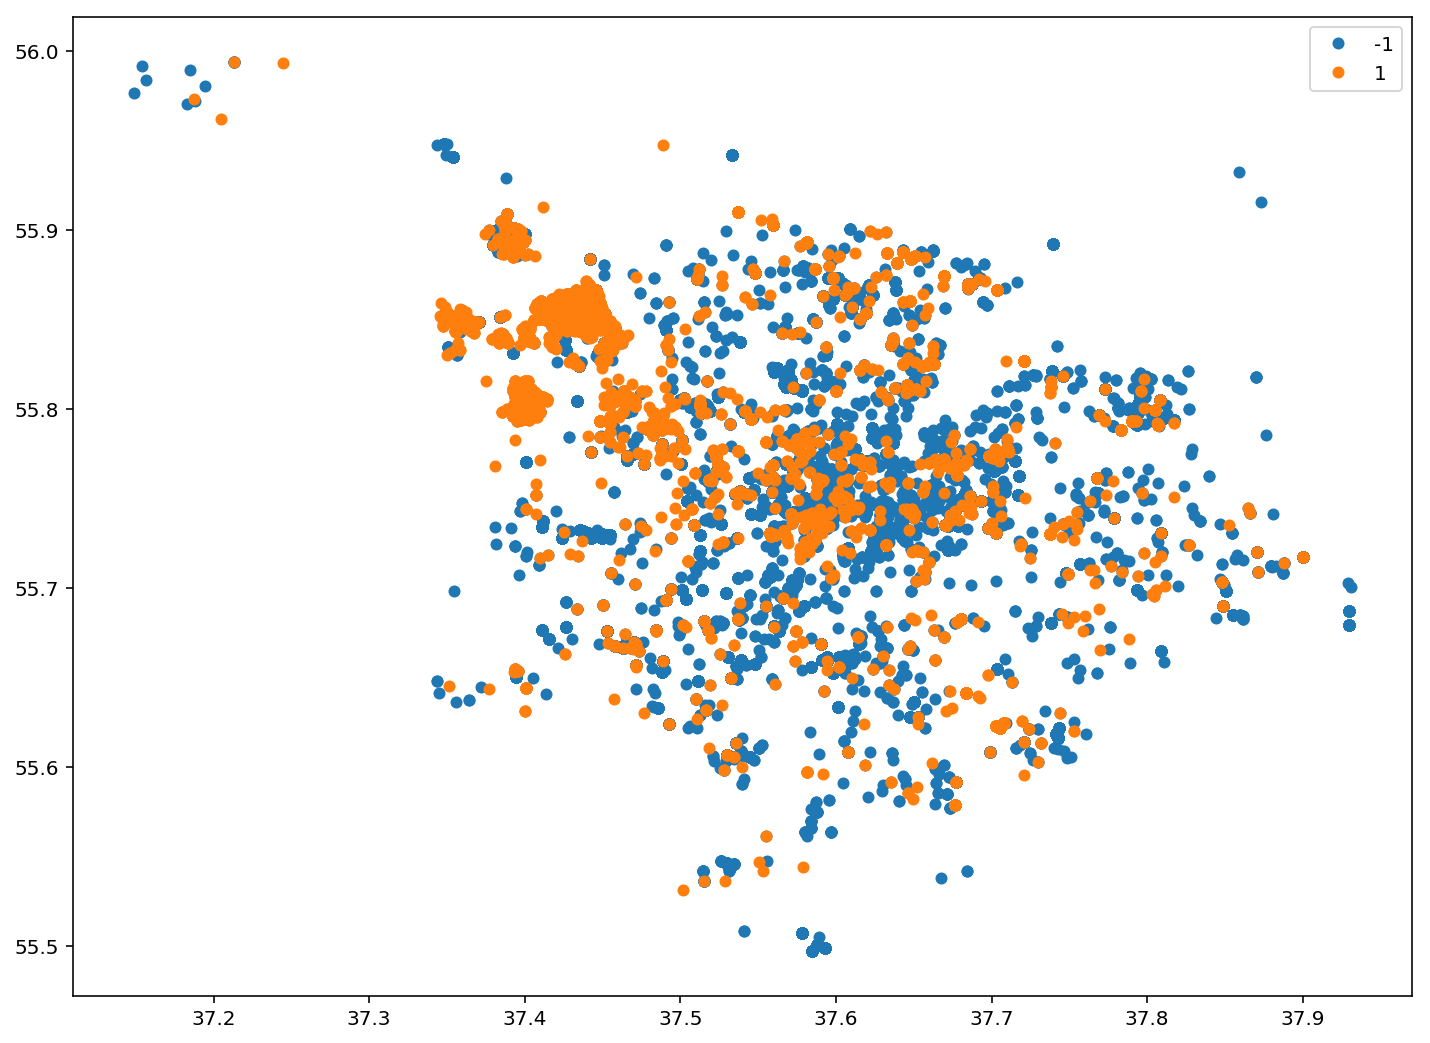

In [41]:
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
    plt.legend()

plt.show()

## Kmeans

In [6]:
k_inertia = []
ks = range(1,40)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

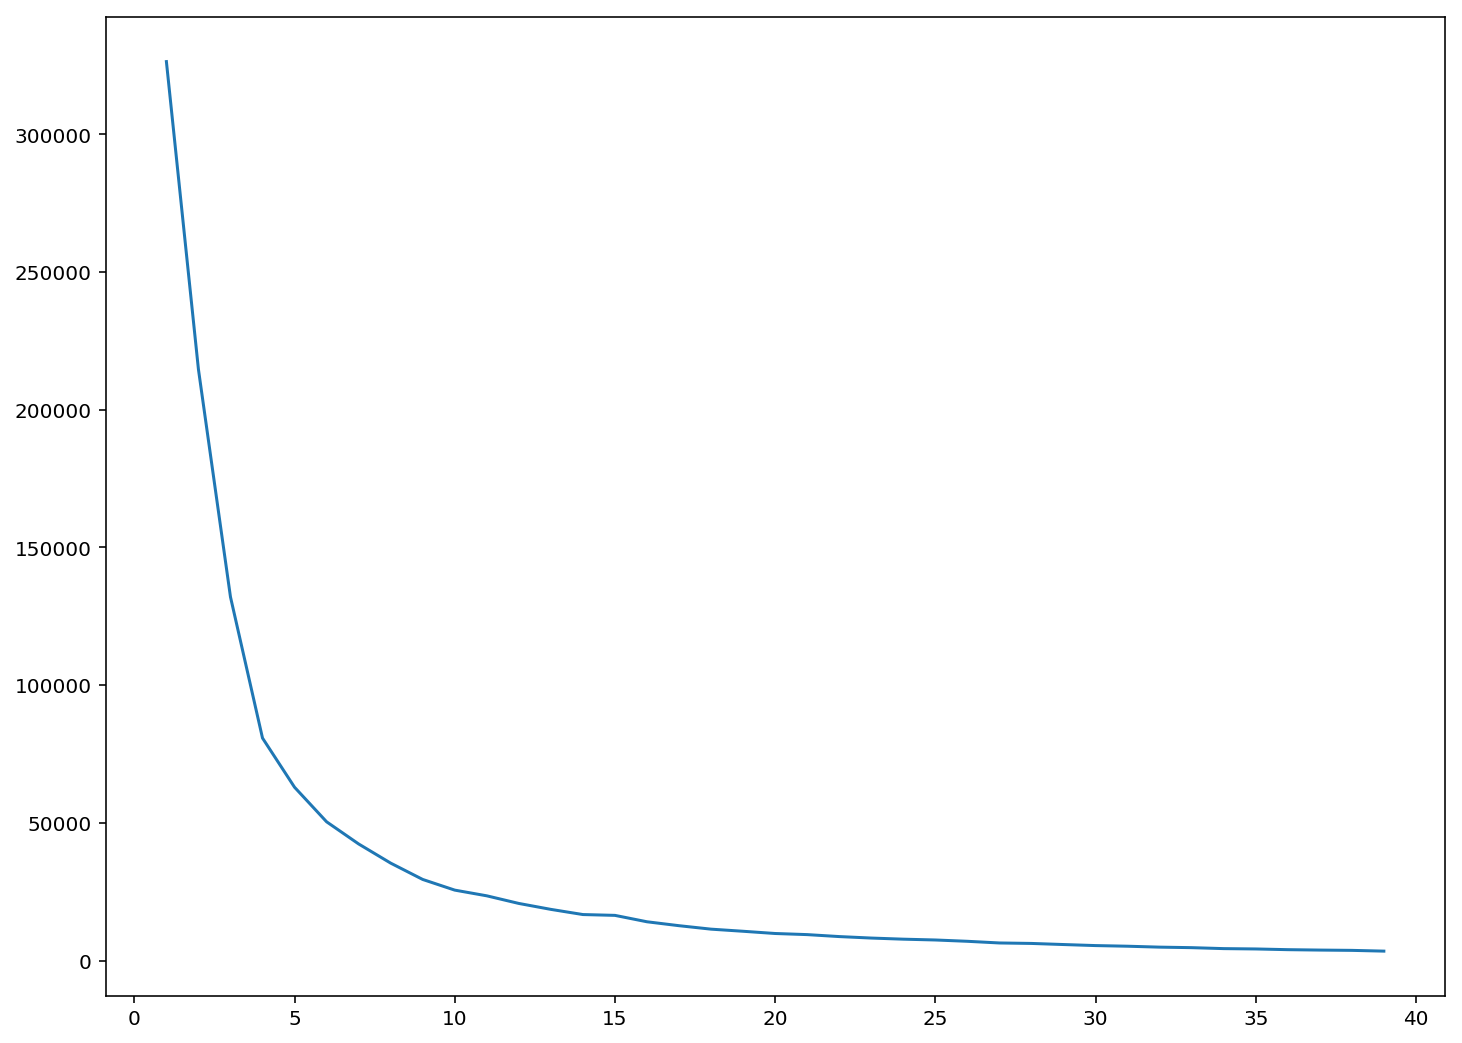

In [7]:
plt.plot(ks, k_inertia);

In [8]:
diff = np.diff(k_inertia)

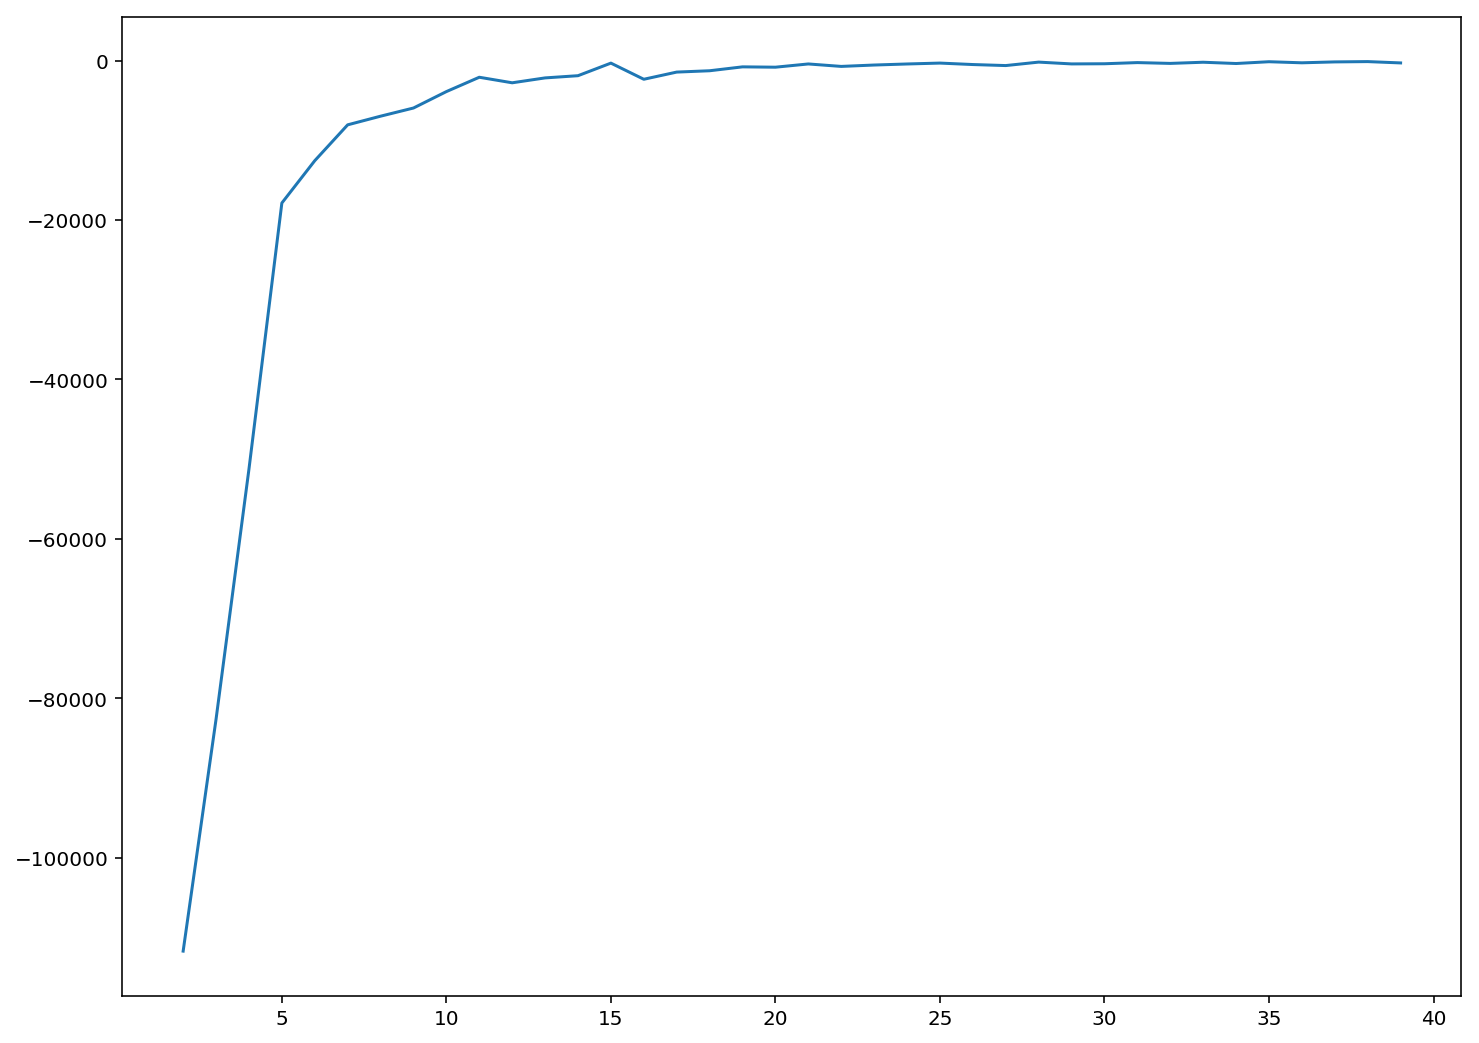

In [9]:
plt.plot(ks[1:], diff);

In [10]:
diff_r = diff[1:] / diff[:-1]

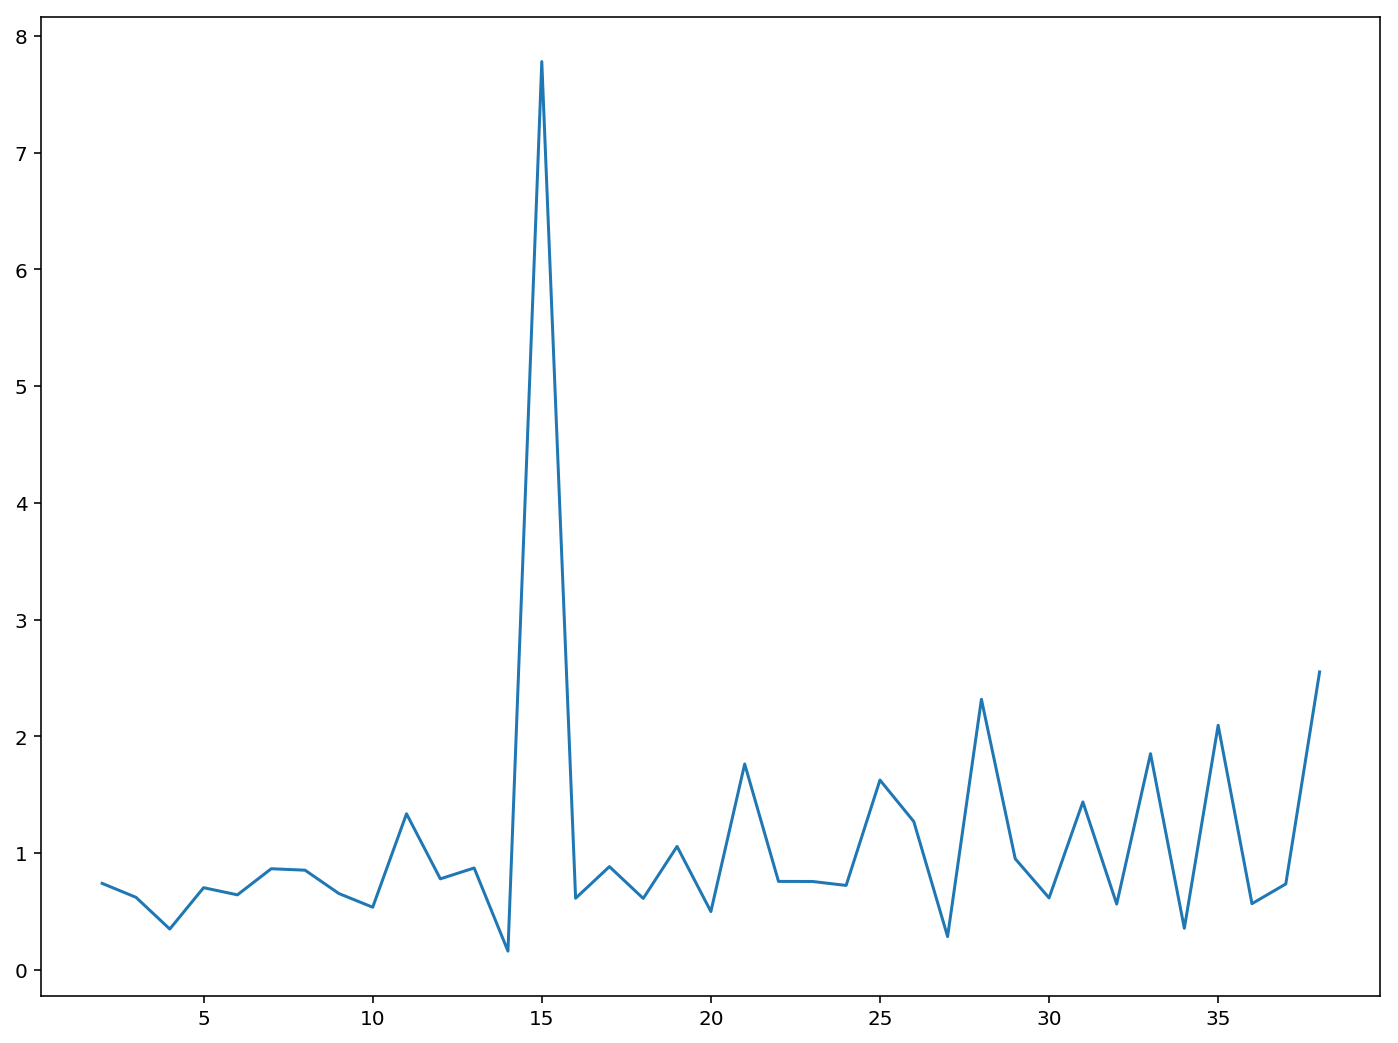

In [11]:
plt.plot(ks[1:-1], diff_r);

In [12]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt     

14

In [65]:
kmeans = KMeans(n_clusters=k_opt)
kmeans.fit(data_scaled)
y_kmeans = kmeans.predict(data_scaled)

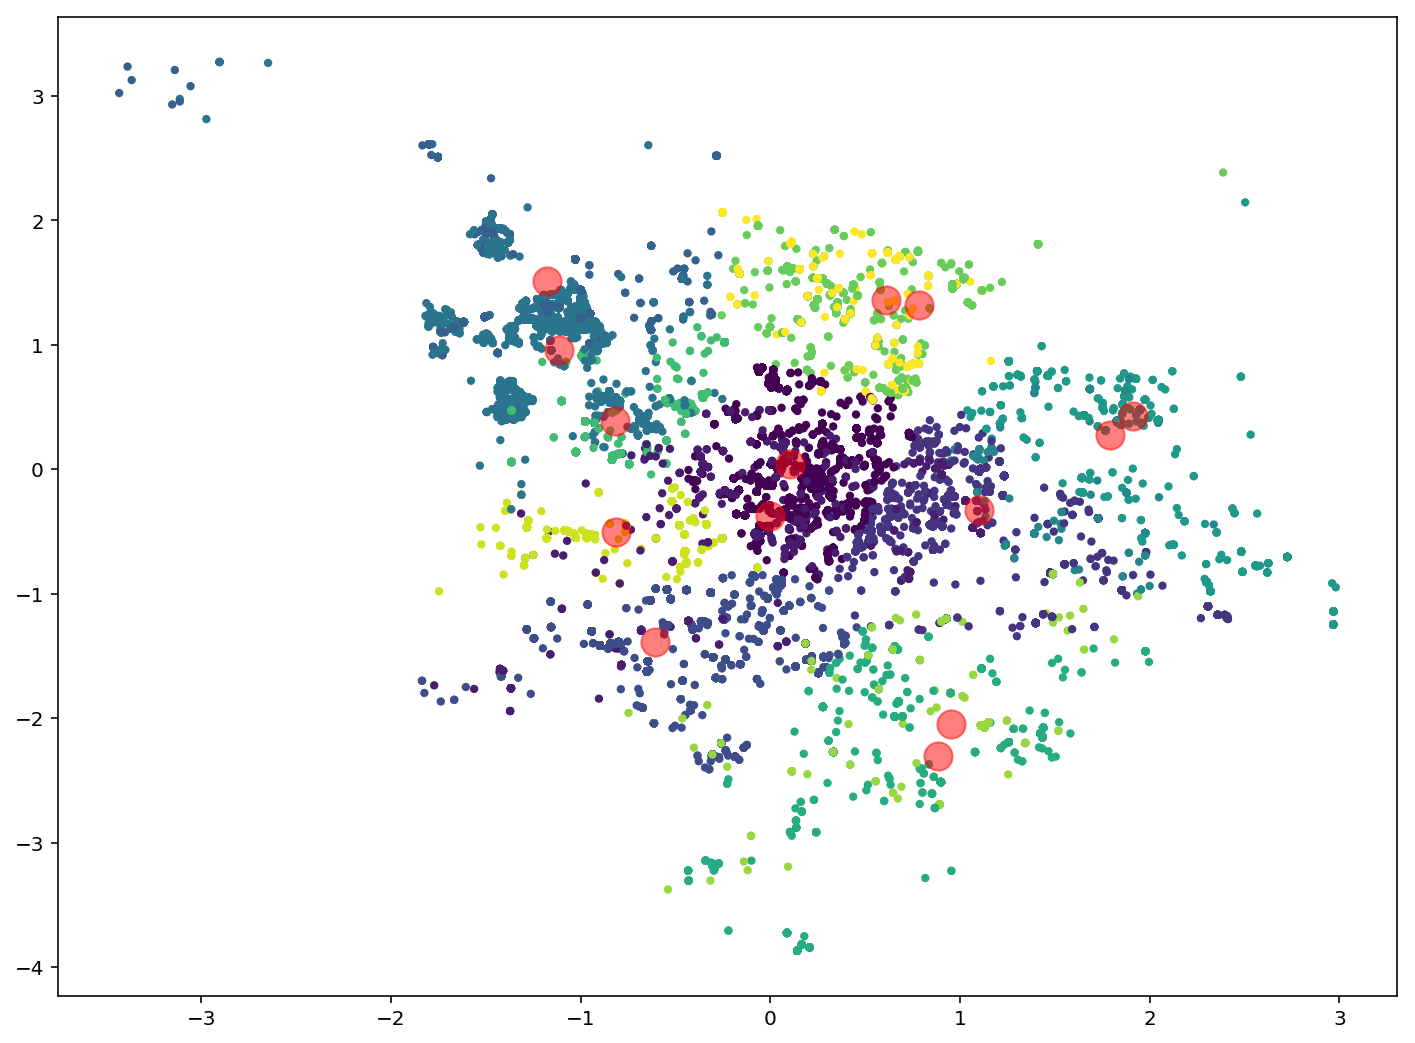

In [66]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=10, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## DBSCAN

In [60]:
db = DBSCAN(eps=0.3, min_samples=10).fit(data_scaled)

In [61]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [62]:
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [63]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

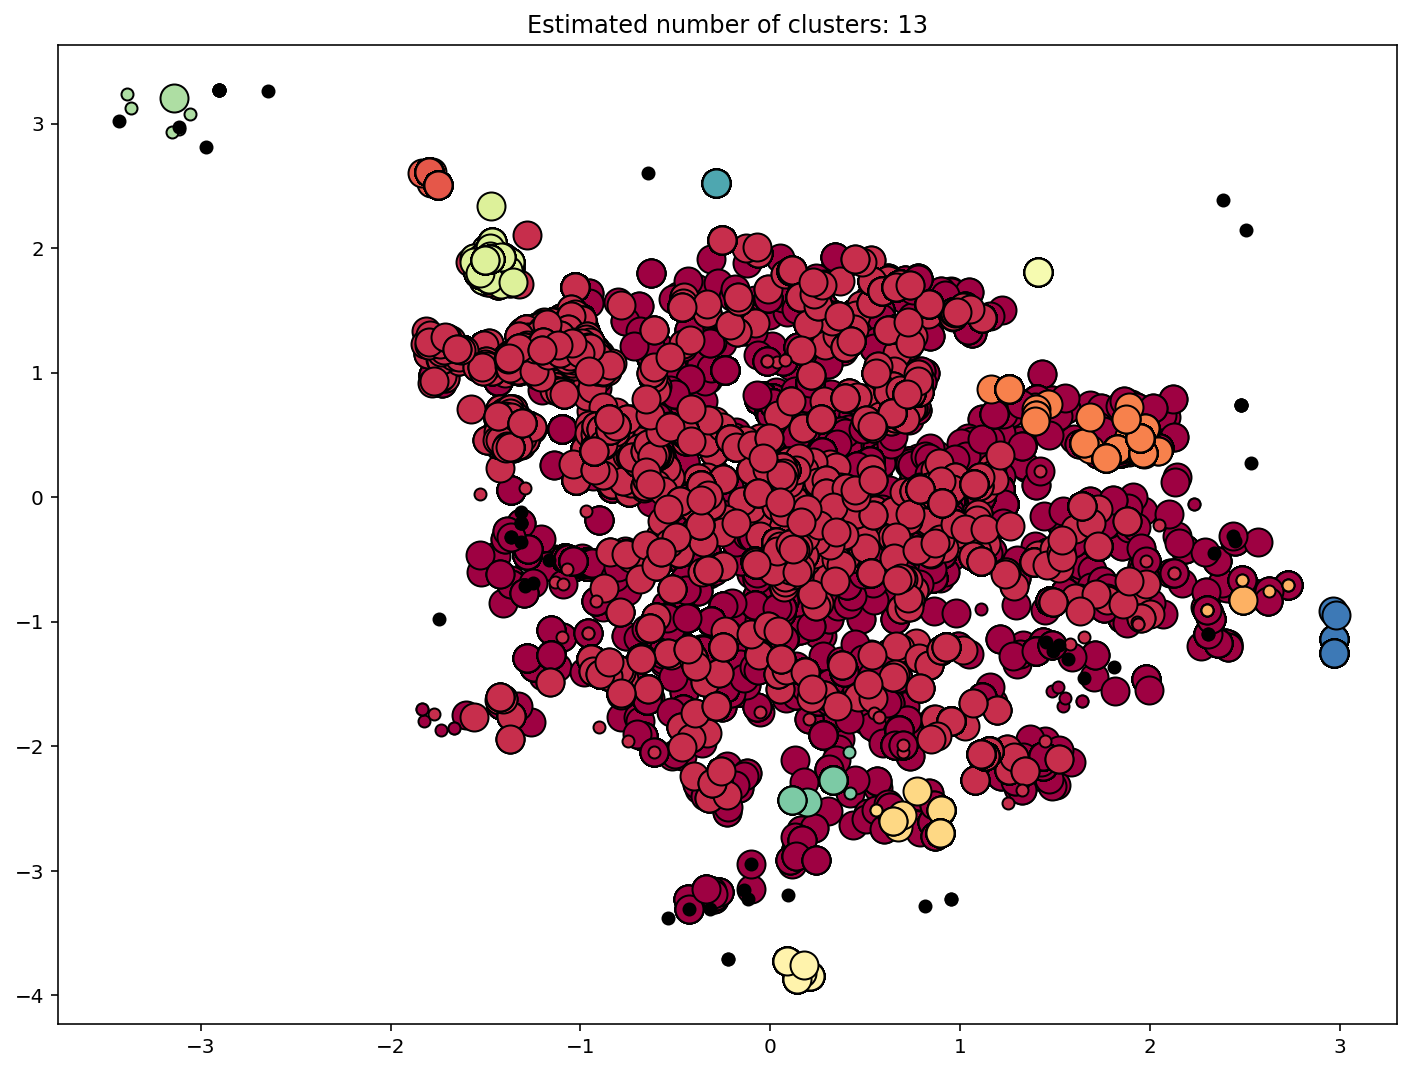

In [64]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()